### Importing the Libraries

In [98]:
import pandas as pd # pandas library
import pandasql as ps # panda sql to write complex sql queries and filter out data from the raw data set
import numpy as np # numpy to replace or generate new mathematical values
import matplotlib.pyplot as plt # to plot graph to identify data
import seaborn as sns # Seaborn library for visualisation 
import warnings # Import warning liabraries to ignore standard warnings 
warnings.filterwarnings("ignore")
from matplotlib import style
style.use('seaborn-whitegrid')

### Reading the dataset

In [99]:
# Please adjust the path according to the file you have kept
df = pd.read_csv('./loan/loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Looking at the columns

In [100]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Checking for Null Values in all columns

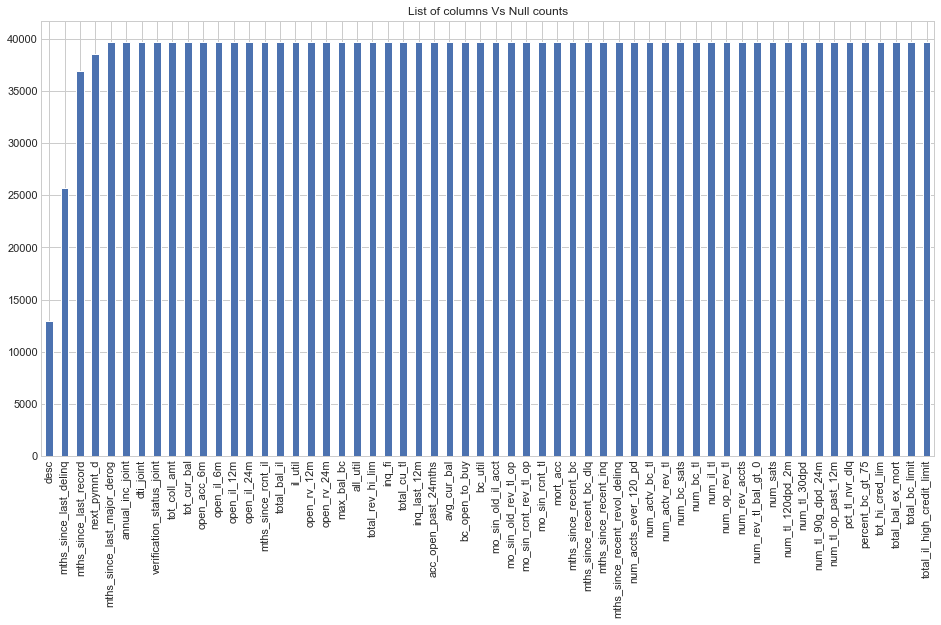

In [101]:
null_columns = df.isnull().sum()  # to find the number of null values in each column
null_columns = null_columns[null_columns.values > (0.30 * len(df))]
plt.gcf().set_size_inches(16, 8)
null_columns.plot(kind='bar')
plt.title('List of columns Vs Null counts')
plt.show()

# Data understanding and Data Cleaning and Manipulation 

### Dropping columns from the data frame as these columns has either 0 or NA and there is no meaning to keep these columns

In [102]:
# deleting from 54 index to 111 index of the columns as these columns has entire NA or 0 values and we can't derive anything from these columns
cols = []
for i in range(54, 111):
    cols.append(i)
df = df.drop(df.columns[cols], axis=1)

### Now we will remove more columns which as no useful information, This part will remove all columns with unwanted data and null values

In [103]:
# These columns has text meanings like url and description which is of no use
# Also some of the columns as NA in all rows
# Column like next_pymnt_d has few rows as date rest all are blank is of no use
# Column like earliest_cr_line has year in some column and day in some column which is of no use as we can't identify what will be the year of the rows where day is provided instead of year
# Column like pymnt_plan as all rows as n which is of again no use
# Column like mths_since_last_delinq and mths_since_last_record has few rows with values others are NA, now we can replace the rows with NA as 0 but these column describes the month setting it as 0 has no meaning
# Column like initial_list_status has all rows as f which is of no use
df = df.drop(['annual_inc_joint','earliest_cr_line',
'next_pymnt_d',
'emp_title',
'url',
'desc',
'title',
'zip_code',
'collections_12_mths_ex_med',
'mths_since_last_major_derog', 'pymnt_plan', 'mths_since_last_delinq', 'mths_since_last_record', 'initial_list_status'], axis=1)

### Now lets drop the left columns that as more than 30 percent missing values

In [104]:
limit = len(df)*0.7
df = df.dropna(thresh = limit, axis = 1)

### After removing the null values

In [105]:
round(100*(df.isnull().sum()/len(df.index)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_re

### Now we will remove the percentage sign from the rows for this columns

In [106]:
df['int_rate'] = df['int_rate'].str.replace('%', '')
df['revol_util'] = df['revol_util'].str.replace('%', '')

### Now we will type cast the decimal values from string to float for the following columns

In [107]:
data_types_dict = {
    'loan_amnt': float,
    'funded_amnt': float,
    'funded_amnt_inv': float,
    'installment': float,
    'annual_inc': float,
    'dti': float,
    'revol_bal': float,
    'revol_util': float,
    'out_prncp': float,
    'out_prncp_inv': float,
    'total_pymnt': float,
    'total_pymnt_inv': float,
    'total_rec_prncp': float,
    'total_rec_int': float,
    'total_rec_late_fee': float,
    'recoveries': float,
    'collection_recovery_fee': float,
    'last_pymnt_amnt': float
}

df = df.astype(data_types_dict)



### Converting the columns to date time


In [108]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format = '%b-%y')

# Data analysis

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   member_id                39717 non-null  int64         
 2   loan_amnt                39717 non-null  float64       
 3   funded_amnt              39717 non-null  float64       
 4   funded_amnt_inv          39717 non-null  float64       
 5   term                     39717 non-null  object        
 6   int_rate                 39717 non-null  object        
 7   installment              39717 non-null  float64       
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_length               38642 non-null  object        
 11  home_ownership           39717 non-null  object        
 12  annual_inc               39717 n

### Now we cans ee there are some extra spaces with a string in the term column


In [110]:
df['term'] = df['term'].str.replace(' months', '').astype(int)

### Now that we have cleaned the datasets lets check few records

In [111]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type
0,1077501,1296599,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,May-16,1,INDIVIDUAL
1,1077430,1314167,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,Sep-13,1,INDIVIDUAL
2,1077175,1313524,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,May-16,1,INDIVIDUAL
3,1076863,1277178,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,Apr-16,1,INDIVIDUAL
4,1075358,1311748,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,May-16,1,INDIVIDUAL
5,1075269,1311441,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,...,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,Jan-16,1,INDIVIDUAL
6,1069639,1304742,7000.0,7000.0,7000.0,60,15.96,170.08,C,C5,...,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,May-16,1,INDIVIDUAL
7,1072053,1288686,3000.0,3000.0,3000.0,36,18.64,109.43,E,E1,...,3000.00,939.14,0.00,0.00,0.00,2015-01-01,111.34,Dec-14,1,INDIVIDUAL
8,1071795,1306957,5600.0,5600.0,5600.0,60,21.28,152.39,F,F2,...,162.02,294.94,0.00,189.06,2.09,2012-04-01,152.39,Aug-12,1,INDIVIDUAL
9,1071570,1306721,5375.0,5375.0,5350.0,60,12.69,121.45,B,B5,...,673.48,533.42,0.00,269.29,2.52,2012-11-01,121.45,Mar-13,1,INDIVIDUAL


# Now lets analyze the data

In [112]:
# Lets check how many users utilized the limit to how much
df.revol_util.describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [113]:
# Lets check how many people who took loan as their own home and how many of them has rented
# Lets also replace the NONE with rent
df['home_ownership'] = df.home_ownership.str.replace('NONE','RENT')

df2 = ps.sqldf("SELECT count(home_ownership) as total_count, home_ownership from df group by home_ownership")
df2

,total_count,home_ownership
0,17659,MORTGAGE
1,98,OTHER
2,3058,OWN
3,18902,RENT


In [114]:
# Lets check how many people fully paid their loans
df2 = ps.sqldf("SELECT count(loan_status) as total_count, loan_status from df group by loan_status")
df2

,total_count,loan_status
0,5627,Charged Off
1,1140,Current
2,32950,Fully Paid


In [115]:
# Lets check how many people's verification was completed
df2 = ps.sqldf("SELECT count(verification_status) as total_count, verification_status from df group by verification_status")
df2

,total_count,verification_status
0,16921,Not Verified
1,9987,Source Verified
2,12809,Verified


In [116]:
# Lets check the number of loans by emp_length
# emp_length = Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [117]:
# Lets check for people who have past-due incidences for 30+ days of delinquency in the borrower's credit file for the past 2 years and get the total count
df['delinq_2yrs'].sum()

5819

In [118]:
# Lets check the top 10 maximum interest rate with the grade and sub grade type
df2 = ps.sqldf("SELECT max(int_rate) as max_int_rate, grade, sub_grade from df group by grade, sub_grade order by max_int_rate desc LIMIT 10")
df2

,max_int_rate,grade,sub_grade
0,9.99,B,B1
1,9.99,B,B4
2,9.96,B,B5
3,9.83,B,B3
4,9.76,B,B2
5,9.63,A,A5
6,9.32,A,A4
7,8.00,A,A3
8,7.68,A,A2
9,7.37,A,A1


In [119]:
# Now lets calculate the return to investment
# ROI definition = Return on investment is a widely used financial metric for measuring the probability of gaining a return from an investment. 
# It is a ratio that compares the gain or loss from an investment relative to its cost. It is as useful in evaluating the potential return from a stand alone investment as it is in comparing returns from several investments.

# ROI Formula
# ROI = (Net Return  on  Investment − / Cost Of Investment) × 100%

df['ROI'] = (df['total_pymnt'] / df['funded_amnt']) * 100

df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,ROI
0,1077501,1296599,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.00,2015-01-01,171.62,May-16,1,INDIVIDUAL,117.263104
1,1077430,1314167,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,2013-04-01,119.66,Sep-13,1,INDIVIDUAL,40.348400
2,1077175,1313524,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.00,2014-06-01,649.91,May-16,1,INDIVIDUAL,125.236119
3,1076863,1277178,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,2015-01-01,357.48,Apr-16,1,INDIVIDUAL,122.318900
4,1075358,1311748,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,...,1037.39,0.00,0.00,0.00,2016-05-01,67.79,May-16,1,INDIVIDUAL,117.111000
5,1075269,1311441,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,...,632.21,0.00,0.00,0.00,2015-01-01,161.03,Jan-16,1,INDIVIDUAL,112.644200
6,1069639,1304742,7000.0,7000.0,7000.0,60,15.96,170.08,C,C5,...,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,May-16,1,INDIVIDUAL,144.440571
7,1072053,1288686,3000.0,3000.0,3000.0,36,18.64,109.43,E,E1,...,939.14,0.00,0.00,0.00,2015-01-01,111.34,Dec-14,1,INDIVIDUAL,131.304510
8,1071795,1306957,5600.0,5600.0,5600.0,60,21.28,152.39,F,F2,...,294.94,0.00,189.06,2.09,2012-04-01,152.39,Aug-12,1,INDIVIDUAL,11.536071
9,1071570,1306721,5375.0,5375.0,5350.0,60,12.69,121.45,B,B5,...,533.42,0.00,269.29,2.52,2012-11-01,121.45,Mar-13,1,INDIVIDUAL,27.464000


In [120]:
# Now lets check which investment made a loss
df[df['ROI'] <= 0]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,ROI
26,1069800,1304679,15000.0,15000.0,8725.0,36,14.27,514.64,C,C2,...,0.0,0.0,0.0,0.0,NaT,0.0,May-16,1,INDIVIDUAL,0.0
2724,1032519,1262161,8000.0,8000.0,3975.0,36,14.65,275.96,C,C3,...,0.0,0.0,0.0,0.0,NaT,0.0,May-16,1,INDIVIDUAL,0.0
3985,1009833,1236591,18000.0,18000.0,18000.0,60,19.03,467.23,E,E2,...,0.0,0.0,0.0,0.0,NaT,0.0,Apr-16,1,INDIVIDUAL,0.0
6967,889684,1106242,2200.0,2200.0,2200.0,60,19.42,57.58,E,E3,...,0.0,0.0,0.0,0.0,NaT,0.0,May-16,1,INDIVIDUAL,0.0
8707,859150,1071830,35000.0,35000.0,34975.0,60,13.99,814.21,C,C3,...,0.0,0.0,0.0,0.0,NaT,0.0,May-16,1,INDIVIDUAL,0.0
14220,768963,954342,3450.0,3450.0,3450.0,36,11.99,114.58,B,B5,...,0.0,0.0,0.0,0.0,NaT,0.0,May-16,1,INDIVIDUAL,0.0
14642,762630,963168,5000.0,5000.0,4175.0,36,16.49,177.00,D,D3,...,0.0,0.0,0.0,0.0,NaT,0.0,May-16,1,INDIVIDUAL,0.0
16301,734671,931223,10000.0,10000.0,8600.0,36,13.43,339.02,C,C3,...,0.0,0.0,0.0,0.0,NaT,0.0,May-16,1,INDIVIDUAL,0.0
16719,727583,923109,5550.0,5550.0,5550.0,60,13.06,126.46,C,C2,...,0.0,0.0,0.0,0.0,NaT,0.0,May-11,1,INDIVIDUAL,0.0
18316,699321,890868,10000.0,10000.0,10000.0,36,13.80,340.81,C,C4,...,0.0,0.0,0.0,0.0,NaT,0.0,Apr-16,1,INDIVIDUAL,0.0


   total_count home_ownership
0        17659       MORTGAGE
1           98          OTHER
2         3058            OWN
3        18902           RENT
   total_count  loan_status
0         5627  Charged Off
1         1140      Current
2        32950   Fully Paid


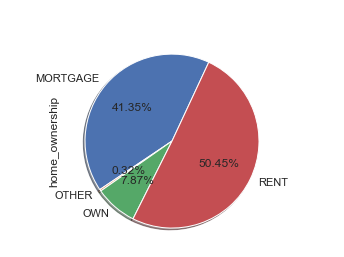

In [121]:
# Now lets visualize the nuber of defaulters

# From these two queries we can clearly see the the number of people with MORTGAGE and 
df2 = ps.sqldf("SELECT count(home_ownership) as total_count, home_ownership from df group by home_ownership")
print(df2)

df2 = df2 = ps.sqldf("SELECT count(loan_status) as total_count, loan_status from df group by loan_status")
print(df2)

# Lets plot a graph to visualize it better
graph =  df[df['loan_status']=='Charged Off'].groupby(['home_ownership'])['home_ownership'].count()

plt.title('People with more defaulters as per home ownership category \n', fontdict={'fontsize':12, 'fontweight':5, 'color':'White'})

graph.plot.pie(autopct='%.2f%%', shadow = True, startangle = 65)
plt.show()

# It clearly shows that people with RENT and Mortgage are more defaulter

In [122]:
# Lets check the type of loan purpose count who are defaulters
df[df['loan_status']=='Charged Off'].groupby(['purpose'])['purpose'].count()

# It clearly shows that people who have taken loan for debt_consolidation are not able to pay the debt

purpose
car                    160
credit_card            542
debt_consolidation    2767
educational             56
home_improvement       347
house                   59
major_purchase         222
medical                106
moving                  92
other                  633
renewable_energy        19
small_business         475
vacation                53
wedding                 96
Name: purpose, dtype: int64

In [124]:
# Lets check the count according to grade who are defaulters
df2 = ps.sqldf("SELECT grade, count(grade) as total_count from df where loan_status = 'Charged Off' group by grade order by total_count desc")
df2

,grade,total_count
0,B,1425
1,C,1347
2,D,1118
3,E,715
4,A,602
5,F,319
6,G,101


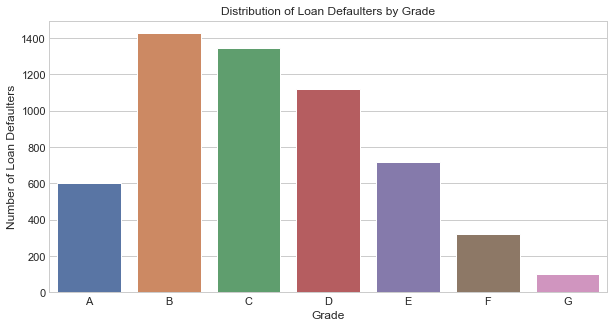

In [125]:
# Now lets check the grades with number of defaulters
plt.figure(figsize=[10, 5])
sns.countplot(x='grade',  data=df[df['loan_status']=='Charged Off'], order=np.sort(df['grade'].unique()))
plt.title('Distribution of Loan Defaulters by Grade')
plt.xlabel("Grade")
plt.ylabel("Number of Loan Defaulters")
plt.show()

# Here you can clearly see that the grade B, C and D are the type of grades where defaulter are max

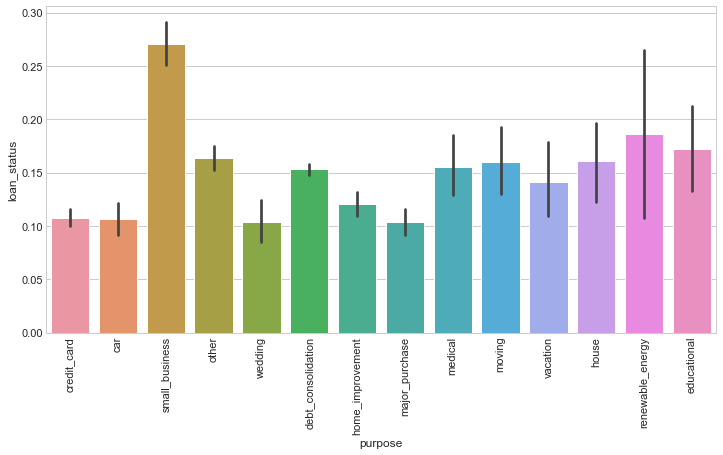

In [126]:
# Now we will see what type of loan has more number of defaulters

loan_tmp = df[df['loan_status'] != 'Current']
loan_tmp['loan_status'] = loan_tmp['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.barplot(x='purpose', y='loan_status', data=loan_tmp)
plt.show() 

# From these plot we can clearly see that the small business, renewable energy and educational type of loan as maximum number of defaulters.


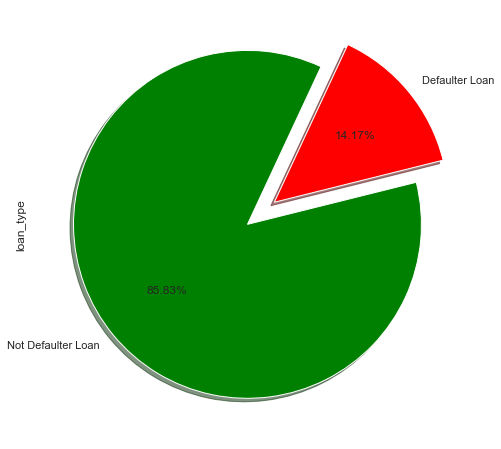

In [127]:
# Now we will see how much loan are defaulter loan in percentage

def loan_type(status):
    if status == "Charged Off":
        return 'Defaulter Loan'
    else:
        return 'Not Defaulter Loan'


df['loan_type'] = df['loan_status'].apply(loan_type)

plt.figure(figsize=(8,8))
colors = ["green", "red", "orange", "blue"]

df.loan_type.value_counts().plot.pie(explode = [0, 0.2], colors=colors, autopct='%1.2f%%', shadow = True, startangle = 65)
plt.show()
# From the observation we can clearly see that there are 14.17 % of defaulter loan

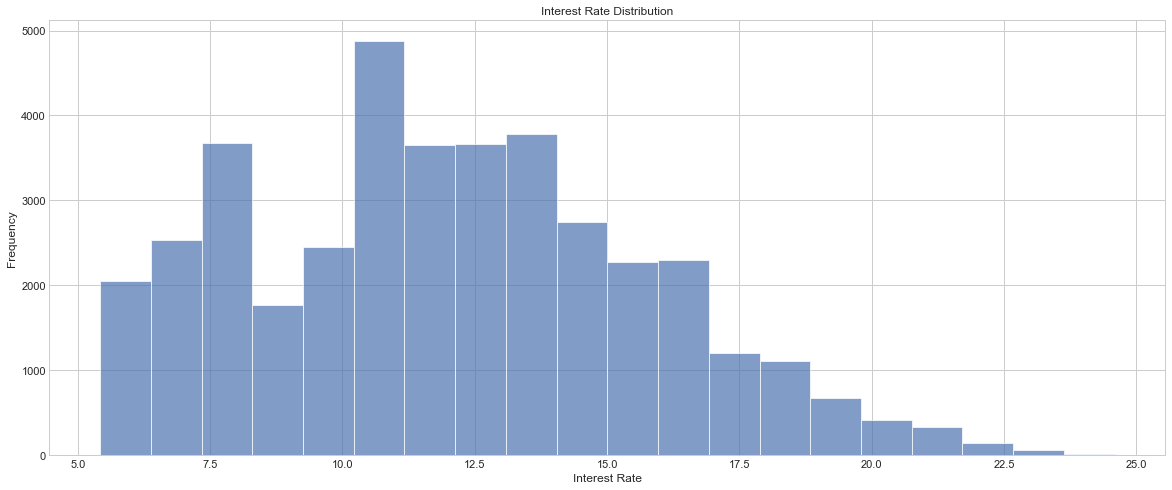

In [128]:
# Now we will see the interest rate distribution using histogram

y = df.int_rate.values.astype(float)
pd.Series(y).plot(kind='hist',alpha=.7, bins=20, title='Interest Rate Distribution',figsize=(20,8),grid=True)
sns.set()
plt.xlabel('Interest Rate')
plt.show()

# Observation : Interest distribution signifies that the percentage is more concentrated between 10 and 14.

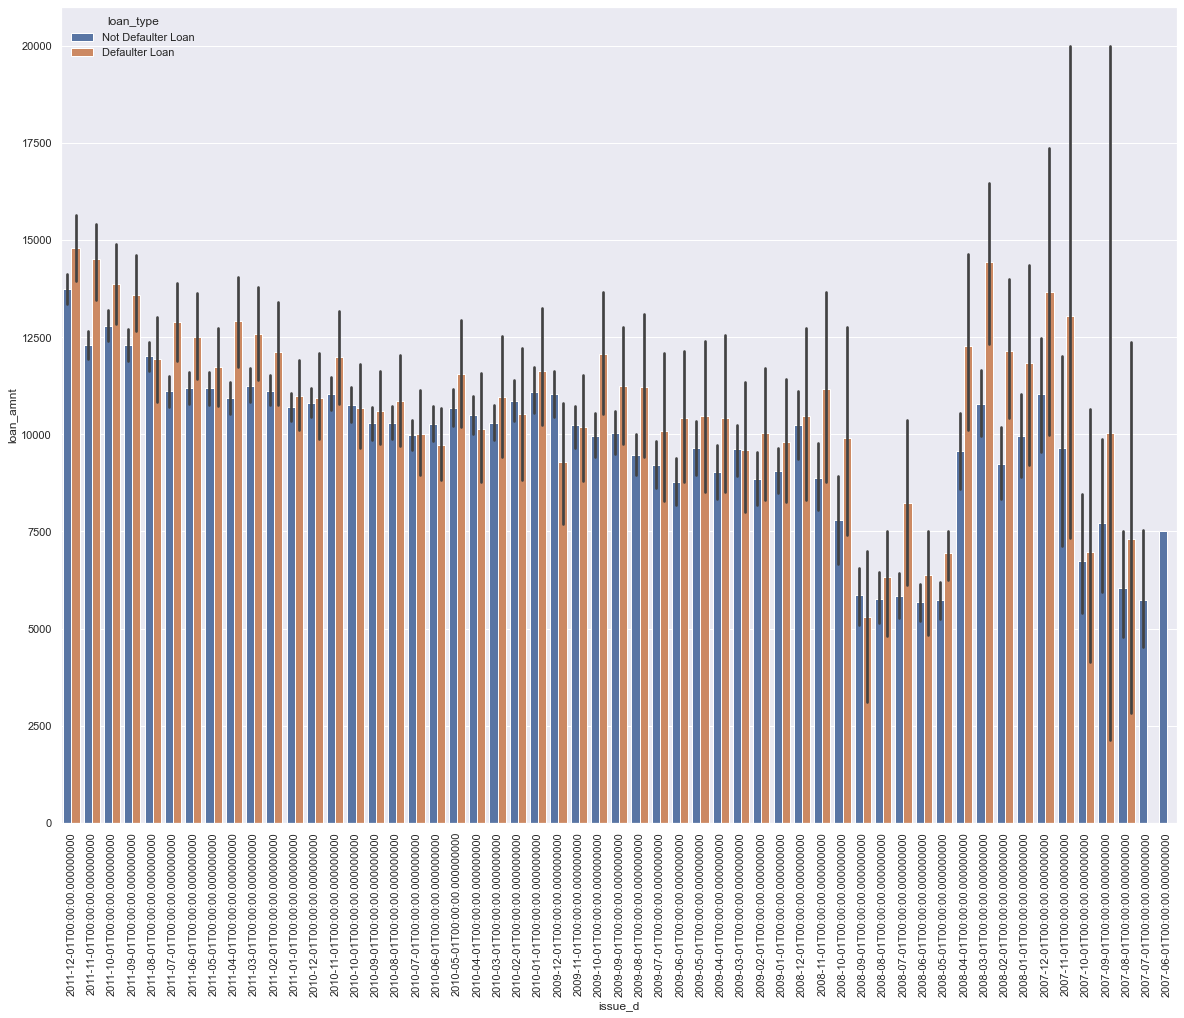

In [133]:
# Now we will check how loans are issued every month
plt.figure(figsize=(20,15))
sns.barplot(x=df.issue_d, y=df.loan_amnt, hue=df.loan_type)
plt.xticks(rotation=90)
plt.show()

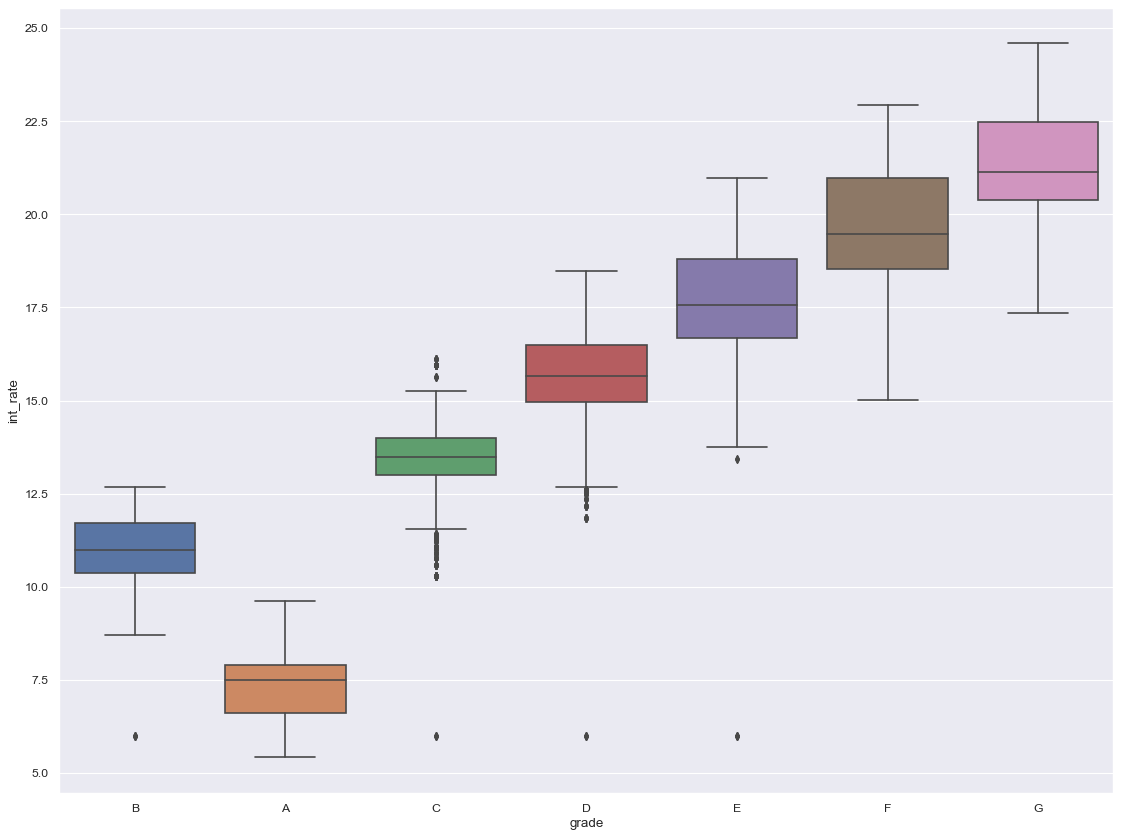

In [140]:
# Finally we will check the relationship between the grade and the interest rate
plt.figure(num=None, figsize=(17, 13), dpi=80, facecolor='w', edgecolor='k')
df['int_rate'] = df['int_rate'].astype(float)
sns.boxplot(x='grade',y='int_rate', data=df, order=df['grade'].value_counts().index)
plt.show()
